In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from enum import Enum

# Declaring variables and classes

In [2]:
class Dictionary_Type(Enum):
    LOW = 0
    HIGH = 1
    ODD = 2
    EVEN = 3

In [3]:
number_cols = ['NUMBER1', ' NUMBER2', 'NUMBER3', 'NUMBER4', 'NUMBER5']

In [4]:
low_odd = [1,3,5,7,9,11,13,15,17,19,21,23,25]
low_even = [2,4,6,8,10,12,14,16,18,20,22,24]
high_odd = [27,29,31,33,35,37,39,41,43,45,47,49]
high_even = [26,28,30,32,34,36,38,40,42,44,46,48,50]

# LOAD RESULTS

In [5]:
df = pd.read_csv("Results/total.csv")

In [6]:
df

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR
0,7,8,24,25,47,8,9,2004
1,3,4,27,29,37,5,6,2004
2,15,19,22,46,49,2,9,2004
3,1,3,13,16,43,2,7,2004
4,1,11,15,42,49,3,4,2004
...,...,...,...,...,...,...,...,...
1536,3,12,19,24,30,2,5,2022
1537,6,17,25,31,46,9,12,2022
1538,4,23,32,33,44,9,12,2022
1539,2,14,37,44,50,7,11,2022


### Verify duplicated results

In [7]:
df[df[['NUMBER1', 'NUMBER2', 'NUMBER3', 'NUMBER4', 'NUMBER5', 'STAR1', 'STAR2']].duplicated()]

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR


In [8]:
# LOW = 0
# HIGH = 1
# ODD = 2
# EVEN = 3
# This code 1-3-0-2 will be used as a dictionary. Example:13-02
#     Split through ;
#     13 means high-even --> so choose a number from high_even array
#     02 mean low-odd --> so choose a number from low-odd array
    
# '3high-even;2low-odd', 1-3-0-2
# '3low-odd;2high-even', 0-2-1-3
# '3high-odd;2low-odd', 1-2-0-2
# '3low-even;2high-odd', 0-3-1-2
# '3low-odd;2low-even' 0-2-0-3

In [9]:
# Generates 4 types of results
# 3-high-odd-2-low-even
# 3-low-odd-2-high-even
# 3-high-even-2-low-odd
# 3-low-even-2-high-odd
def generate_result():
    result1 = random.sample(high_odd, 3) + random.sample(low_even, 2)
    result2 = random.sample(low_odd, 3) + random.sample(high_even, 2)
    result3 = random.sample(high_even, 3) + random.sample(low_odd, 2)
    result4 = random.sample(low_even, 3) + random.sample(high_odd, 2)
    return result1, result2, result3, result4

In [10]:
# Receives list of types of results and then verify if exists in dataframe that has results
def compare_results(results_list, df_result):
    found = False
    for result in results_list:
        matches = df_result[(df_result==np.array(result)).all(axis=1)]
        if matches.empty == False:
            found = True
    return found

In [11]:
# Generate keys until it finds a compatible result according to df_balls
def test(df_balls):
    key_found = False
    generator_counter = 0
    while key_found == False:
        b_result1, b_result2, b_result3, b_result4 = generate_result()
        key_found = compare_results([b_result1, b_result2, b_result3, b_result4], df_balls)
        generator_counter += 1
    number_keys_generated = generator_counter*4
    print("Number of keys generated ", str(number_keys_generated))
    return number_keys_generated

In [12]:
array = np.array([2,2,0,1])
#print(array.index(2))

In [13]:
for i in np.where(array == 2)[0]:
    print(i)

0
1


In [14]:
2 in array

True

In [15]:
# Returns two columns filled with type of result and the code
def get_type(df):
    
    def get_code(type_str):
        array = type_str.split("-")
        return str(Dictionary_Type[array[0]].value) + str(Dictionary_Type[array[1]].value)
    
    def get_output(type_counter2):
        counter_np = np.array(type_counter2)
        switcher = {
            0: 'LOW-ODD',
            1: 'LOW-EVEN',
            2: 'HIGH-ODD',
            3: 'HIGH-EVEN'
        }
        output = []
        output2 = []
        if 3 in counter_np:
            index = np.where(counter_np == 3)[0][0]
            output.append(str(3) + switcher.get(index))
            output2.append(get_code(switcher.get(index)))
        if 2 in counter_np:
            for i in np.where(counter_np == 2)[0]:
                output.append(str(2) + switcher.get(i))
                output2.append(get_code(switcher.get(i)))
        return ";".join(output), "-".join(output2)
    
    new_column = []
    new_column_code = []
    low_odd_counter = 0
    low_even_counter = 0
    high_odd_counter = 0
    high_even_counter = 0
    
    type_counter = [low_odd_counter,low_even_counter,high_odd_counter,high_even_counter]
    for list_values in df.values:
        for result in list_values:
            if result in low_odd:
                type_counter[0] +=1
            elif result in low_even:
                type_counter[1] +=1
            elif result in high_odd:
                type_counter[2] +=1
            elif result in high_even:
                type_counter[3] +=1
        str_type, code_type = get_output(type_counter)
        new_column.append(str_type)
        new_column_code.append(code_type)
        type_counter = [0,0,0,0]
    
    return new_column,new_column_code

In [16]:
# Returns column filled with number of type results
def count_type(df):
    new_column = []
    for value in df.values:
        #print(value)
        new_column.append(len(value.split(";")))
    return new_column

In [17]:
def append_info(df):
    column_type_str, column_type_code = get_type(df[number_cols])
    df1 = df.assign(TYPE_RESULT=column_type_str)
    df2 = df1.assign(CODE_TYPE=column_type_code)
    df_final = df2.assign(COUNT_TYPE=lambda x: count_type(x['TYPE_RESULT']))
    return df_final

# Transform

In [18]:
column_type_str, column_type_code = get_type(df[['NUMBER1', 'NUMBER2', 'NUMBER3', 'NUMBER4', 'NUMBER5']])
df_type = df.assign(TYPE_RESULT=column_type_str)
df_type2 = df_type.assign(CODE_TYPE=column_type_code)
df_final = df_type2.assign(COUNT_TYPE=lambda x: count_type(x['TYPE_RESULT']))
display(df_final)

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
0,7,8,24,25,47,8,9,2004,2LOW-ODD;2LOW-EVEN,02-03,2
1,3,4,27,29,37,5,6,2004,3HIGH-ODD,12,1
2,15,19,22,46,49,2,9,2004,2LOW-ODD,02,1
3,1,3,13,16,43,2,7,2004,3LOW-ODD,02,1
4,1,11,15,42,49,3,4,2004,3LOW-ODD,02,1
...,...,...,...,...,...,...,...,...,...,...,...
1536,3,12,19,24,30,2,5,2022,2LOW-ODD;2LOW-EVEN,02-03,2
1537,6,17,25,31,46,9,12,2022,2LOW-ODD,02,1
1538,4,23,32,33,44,9,12,2022,2HIGH-EVEN,13,1
1539,2,14,37,44,50,7,11,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2


In [19]:
df_final_good_results = df_final[df_final['COUNT_TYPE'] > 1]
df_final_good_results

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
0,7,8,24,25,47,8,9,2004,2LOW-ODD;2LOW-EVEN,02-03,2
5,1,4,24,34,36,6,8,2004,2LOW-EVEN;2HIGH-EVEN,03-13,2
7,4,11,12,13,32,3,9,2004,2LOW-ODD;2LOW-EVEN,02-03,2
11,14,21,22,37,43,5,8,2004,2LOW-EVEN;2HIGH-ODD,03-12,2
16,5,25,33,36,38,2,5,2004,2LOW-ODD;2HIGH-EVEN,02-13,2
...,...,...,...,...,...,...,...,...,...,...,...
1532,1,19,36,38,49,6,9,2022,2LOW-ODD;2HIGH-EVEN,02-13,2
1534,6,16,18,39,47,2,4,2022,3LOW-EVEN;2HIGH-ODD,03-12,2
1536,3,12,19,24,30,2,5,2022,2LOW-ODD;2LOW-EVEN,02-03,2
1539,2,14,37,44,50,7,11,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2


In [20]:
display(df_final[df_final['COUNT_TYPE'] == 1])

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
1,3,4,27,29,37,5,6,2004,3HIGH-ODD,12,1
2,15,19,22,46,49,2,9,2004,2LOW-ODD,02,1
3,1,3,13,16,43,2,7,2004,3LOW-ODD,02,1
4,1,11,15,42,49,3,4,2004,3LOW-ODD,02,1
6,1,18,29,34,37,2,6,2004,2HIGH-ODD,12,1
...,...,...,...,...,...,...,...,...,...,...,...
1529,13,18,38,42,45,7,11,2022,2HIGH-EVEN,13,1
1533,10,25,29,34,45,9,10,2022,2HIGH-ODD,12,1
1535,5,14,35,36,39,7,12,2022,2HIGH-ODD,12,1
1537,6,17,25,31,46,9,12,2022,2LOW-ODD,02,1


In [21]:
print("Number of results with 2 types: ", str(len(df_final_good_results)))
print("Percentage of 2 types: %.2f" % round(len(df_final_good_results)/len(df_final)*100, 2))
print("\n")
print("Number of results with 1 type1: ", str(len(df_final[df_final['COUNT_TYPE'] == 1])))
print("Percentage of 1 type: %.2f" % round(len(df_final[df_final['COUNT_TYPE'] == 1])/len(df_final)*100, 2))

Number of results with 2 types:  728
Percentage of 2 types: 47.24


Number of results with 1 type1:  813
Percentage of 1 type: 52.76


In [22]:
display(df_final[(df_final['COUNT_TYPE'] == 1) & (df_final['YEAR'] == 2022)])

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
1491,10,17,28,44,50,8,12,2022,3HIGH-EVEN,13,1
1492,6,23,36,39,47,8,10,2022,2HIGH-ODD,12,1
1493,19,21,22,31,38,7,11,2022,2LOW-ODD,02,1
1494,2,7,27,34,40,3,11,2022,2HIGH-EVEN,13,1
1495,17,26,36,37,40,9,12,2022,3HIGH-EVEN,13,1
1497,12,28,29,34,48,9,11,2022,3HIGH-EVEN,13,1
1498,3,10,13,42,49,3,9,2022,2LOW-ODD,02,1
1500,10,13,27,36,37,2,10,2022,2HIGH-ODD,12,1
1502,5,28,30,48,49,5,11,2022,3HIGH-EVEN,13,1
1503,3,11,17,45,48,4,8,2022,3LOW-ODD,02,1


In [23]:
display(df_final_good_results[(df_final_good_results['YEAR'] == 2022)])

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
1490,10,35,42,47,48,2,11,2022,2HIGH-ODD;2HIGH-EVEN,12-13,2
1496,6,16,17,25,31,2,6,2022,2LOW-ODD;2LOW-EVEN,02-03,2
1499,15,23,28,34,48,3,5,2022,3HIGH-EVEN;2LOW-ODD,13-02,2
1501,8,22,23,32,50,3,9,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1504,3,25,27,28,29,4,9,2022,2LOW-ODD;2HIGH-ODD,02-12,2
1506,8,20,26,47,48,3,8,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1510,2,12,17,28,46,6,10,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1511,6,24,30,32,48,5,6,2022,3HIGH-EVEN;2LOW-EVEN,13-03,2
1515,2,7,21,31,45,4,10,2022,2LOW-ODD;2HIGH-ODD,02-12,2
1517,6,10,24,27,29,5,12,2022,3LOW-EVEN;2HIGH-ODD,03-12,2


# Analyze

In [24]:
# Plot count of type_result
def plot_type_result(dataframe):
    dataframe.groupby(['TYPE_RESULT']).size().plot(kind='barh')

In [25]:
# Given a dataframe shows the best type_result results
def show_count_type_result(dataframe, n=5):
    display(dataframe \
        .groupby(['TYPE_RESULT'])['TYPE_RESULT'] \
        .count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head(n))

In [26]:
# Given a dataframe shows the best code_type results
def get_best_results(dataframe, n=5):
    return dataframe \
        .groupby(['CODE_TYPE'])['CODE_TYPE'] \
        .count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head(n) \
        ['CODE_TYPE'].values

In [27]:
# Generate results according to array of code_types
def generate_best_results(array):
    results_array = []
    n_balls_select = [3,2]
    for code_type in array:
        code_type_array = code_type.split("-")
        #print(code_type)
        result = []
        for n in range(0,2):
            n_balls = n_balls_select[n]
            code = code_type_array[n]
            code_split = [number for number in code]
            code_str = Dictionary_Type(int(code_split[0])).name + "-" + Dictionary_Type(int(code_split[1])).name
            if code_str == 'LOW-ODD':
                result.append(random.sample(low_odd, n_balls))
            elif code_str == 'LOW-EVEN':
                result.append(random.sample(low_even, n_balls))
            elif code_str == 'HIGH-ODD':
                result.append(random.sample(high_odd, n_balls))
            elif code_str == 'HIGH-EVEN':
                result.append(random.sample(high_even, n_balls))
        results_array.append(np.sort(list(np.concatenate(result))))
    return append_info(pd.DataFrame(data=results_array, columns=number_cols))
    #return results_array

In [28]:
df_final_good_results[(df_final_good_results['YEAR'] == 2022)]

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,STAR1,STAR2,YEAR,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
1490,10,35,42,47,48,2,11,2022,2HIGH-ODD;2HIGH-EVEN,12-13,2
1496,6,16,17,25,31,2,6,2022,2LOW-ODD;2LOW-EVEN,02-03,2
1499,15,23,28,34,48,3,5,2022,3HIGH-EVEN;2LOW-ODD,13-02,2
1501,8,22,23,32,50,3,9,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1504,3,25,27,28,29,4,9,2022,2LOW-ODD;2HIGH-ODD,02-12,2
1506,8,20,26,47,48,3,8,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1510,2,12,17,28,46,6,10,2022,2LOW-EVEN;2HIGH-EVEN,03-13,2
1511,6,24,30,32,48,5,6,2022,3HIGH-EVEN;2LOW-EVEN,13-03,2
1515,2,7,21,31,45,4,10,2022,2LOW-ODD;2HIGH-ODD,02-12,2
1517,6,10,24,27,29,5,12,2022,3LOW-EVEN;2HIGH-ODD,03-12,2


In [29]:
show_count_type_result(df_final_good_results[df_final_good_results['YEAR'] == 2022])

,TYPE_RESULT,count
1,2LOW-EVEN;2HIGH-EVEN,7
5,2LOW-ODD;2LOW-EVEN,5
0,2HIGH-ODD;2HIGH-EVEN,3
4,2LOW-ODD;2HIGH-ODD,3
3,2LOW-ODD;2HIGH-EVEN,2


In [30]:
show_count_type_result(df_final_good_results,10)

,TYPE_RESULT,count
3,2LOW-ODD;2HIGH-EVEN,115
5,2LOW-ODD;2LOW-EVEN,99
4,2LOW-ODD;2HIGH-ODD,94
1,2LOW-EVEN;2HIGH-EVEN,92
0,2HIGH-ODD;2HIGH-EVEN,89
2,2LOW-EVEN;2HIGH-ODD,77
8,3HIGH-EVEN;2LOW-ODD,22
15,3LOW-ODD;2HIGH-EVEN,21
11,3HIGH-ODD;2LOW-ODD,15
13,3LOW-EVEN;2HIGH-ODD,14


In [31]:
list(get_best_results(df_final_good_results,10))

['02-13',
 '02-03',
 '02-12',
 '03-13',
 '12-13',
 '03-12',
 '13-02',
 '12-02',
 '13-03',
 '13-12']

In [32]:
df_generated = generate_best_results(list(get_best_results(df_final_good_results, 10))) #Test of function generate best results with 2022 input
display(df_generated)

,NUMBER1,NUMBER2,NUMBER3,NUMBER4,NUMBER5,TYPE_RESULT,CODE_TYPE,COUNT_TYPE
0,11,17,23,38,46,3LOW-ODD;2HIGH-EVEN,02-13,2
1,4,10,21,23,25,3LOW-ODD;2LOW-EVEN,02-03,2
2,5,21,23,33,45,3LOW-ODD;2HIGH-ODD,02-12,2
3,12,14,16,28,46,3LOW-EVEN;2HIGH-EVEN,03-13,2
4,27,43,44,45,48,3HIGH-ODD;2HIGH-EVEN,12-13,2
5,10,14,18,47,49,3LOW-EVEN;2HIGH-ODD,03-12,2
6,9,23,32,34,40,3HIGH-EVEN;2LOW-ODD,13-02,2
7,15,23,31,43,45,3HIGH-ODD;2LOW-ODD,12-02,2
8,14,24,26,30,40,3HIGH-EVEN;2LOW-EVEN,13-03,2
9,26,29,34,35,44,3HIGH-EVEN;2HIGH-ODD,13-12,2


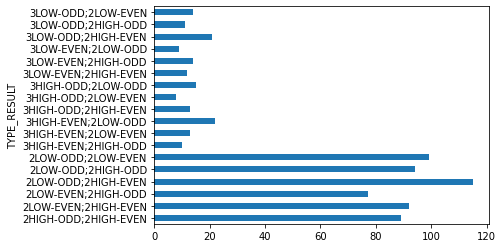

In [33]:
plot_type_result(df_final_good_results)

In [34]:
show_count_type_result(df_final_good_results)

,TYPE_RESULT,count
3,2LOW-ODD;2HIGH-EVEN,115
5,2LOW-ODD;2LOW-EVEN,99
4,2LOW-ODD;2HIGH-ODD,94
1,2LOW-EVEN;2HIGH-EVEN,92
0,2HIGH-ODD;2HIGH-EVEN,89


In [35]:
# Create a new generate result function
# It takes into account df show_count_type_result df
# Generates results according to top 5 type results

In [36]:
# df_final_good_results \
#     .groupby(['TYPE_RESULT'])['TYPE_RESULT'] \
#     .count() \
#     .reset_index(name='count') \
#     .sort_values(['count'], ascending=False) \
#     .head(5)

In [37]:
# show_count_type_result(df_final_good_results)

In [38]:
# df_gb = df_final_good_results.groupby(['TYPE_RESULT']).size()
# df_gb.plot(kind = 'barh')

In [39]:
# b_result1, b_result2, b_result3, b_result4 = generate_result()
# print(b_result1)
# print(b_result2)
# print(b_result3)
# print(b_result4)

In [40]:
# array_number_keys = []
# for i in range(0,10):
#     array_number_keys.append(test())

In [41]:
# df_type_big = df_new2[df_new2['COUNT_TYPE'] > 1]

In [42]:
# len(df)

In [43]:
# df_type_big

In [44]:
# df_type_big \
#     .groupby(['TYPE_RESULT'])['TYPE_RESULT'] \
#     .count() \
#     .reset_index(name='count') \
#     .sort_values(['count'], ascending=False) \
#     .head(10)

In [45]:
# df_type_big \
#     .groupby(['TYPE_RESULT'])['TYPE_RESULT'] \
#     .count() \
#     .reset_index(name='count') \
#     .sort_values(['count'], ascending=False) \
#     .head(5) \
#     ['TYPE_RESULT'] \
#     .values

In [46]:
# df_type_big \
#     .groupby(['TYPE_RESULT'])['TYPE_RESULT'] \
#     .count() \
#     .reset_index(name='count') \
#     .sort_values(['count'], ascending=False) \
#     .plot(kind = 'barh')

In [47]:
# df_gb = df_type_big.groupby(['TYPE_RESULT']).size()
# df_gb.plot(kind = 'barh')

In [48]:
# print("Percentage of results with type bigger than 1: ", str(len(df_type_big)/len(df)*100))

In [49]:
# """
# LOW-ODD = 1,3,5,7,9,11,13,15,17,19,21,23,25
# LOW-EVEN = 2,4,6,8,10,12,14,16,18,20,22,24
# HIGH-ODD = 27,29,31,33,35,37,39,41,43,45,47,49
# HIGH-EVEN = 26,28,30,32,34,36,38,40,42,44,46,48,50
# """
# #3-odd-2-even or the 2-odd-3-even patterns
# #3-low-2-high or 2-low-3-high